In [2]:
# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt

/var/folders/t1/h_38vh5s1tsb_8vd1_0yvnl40000gn/T/ipykernel_20627/365754636.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['nick'] = df3['nick'].str.replace('[0-9a-zA-Z]','')


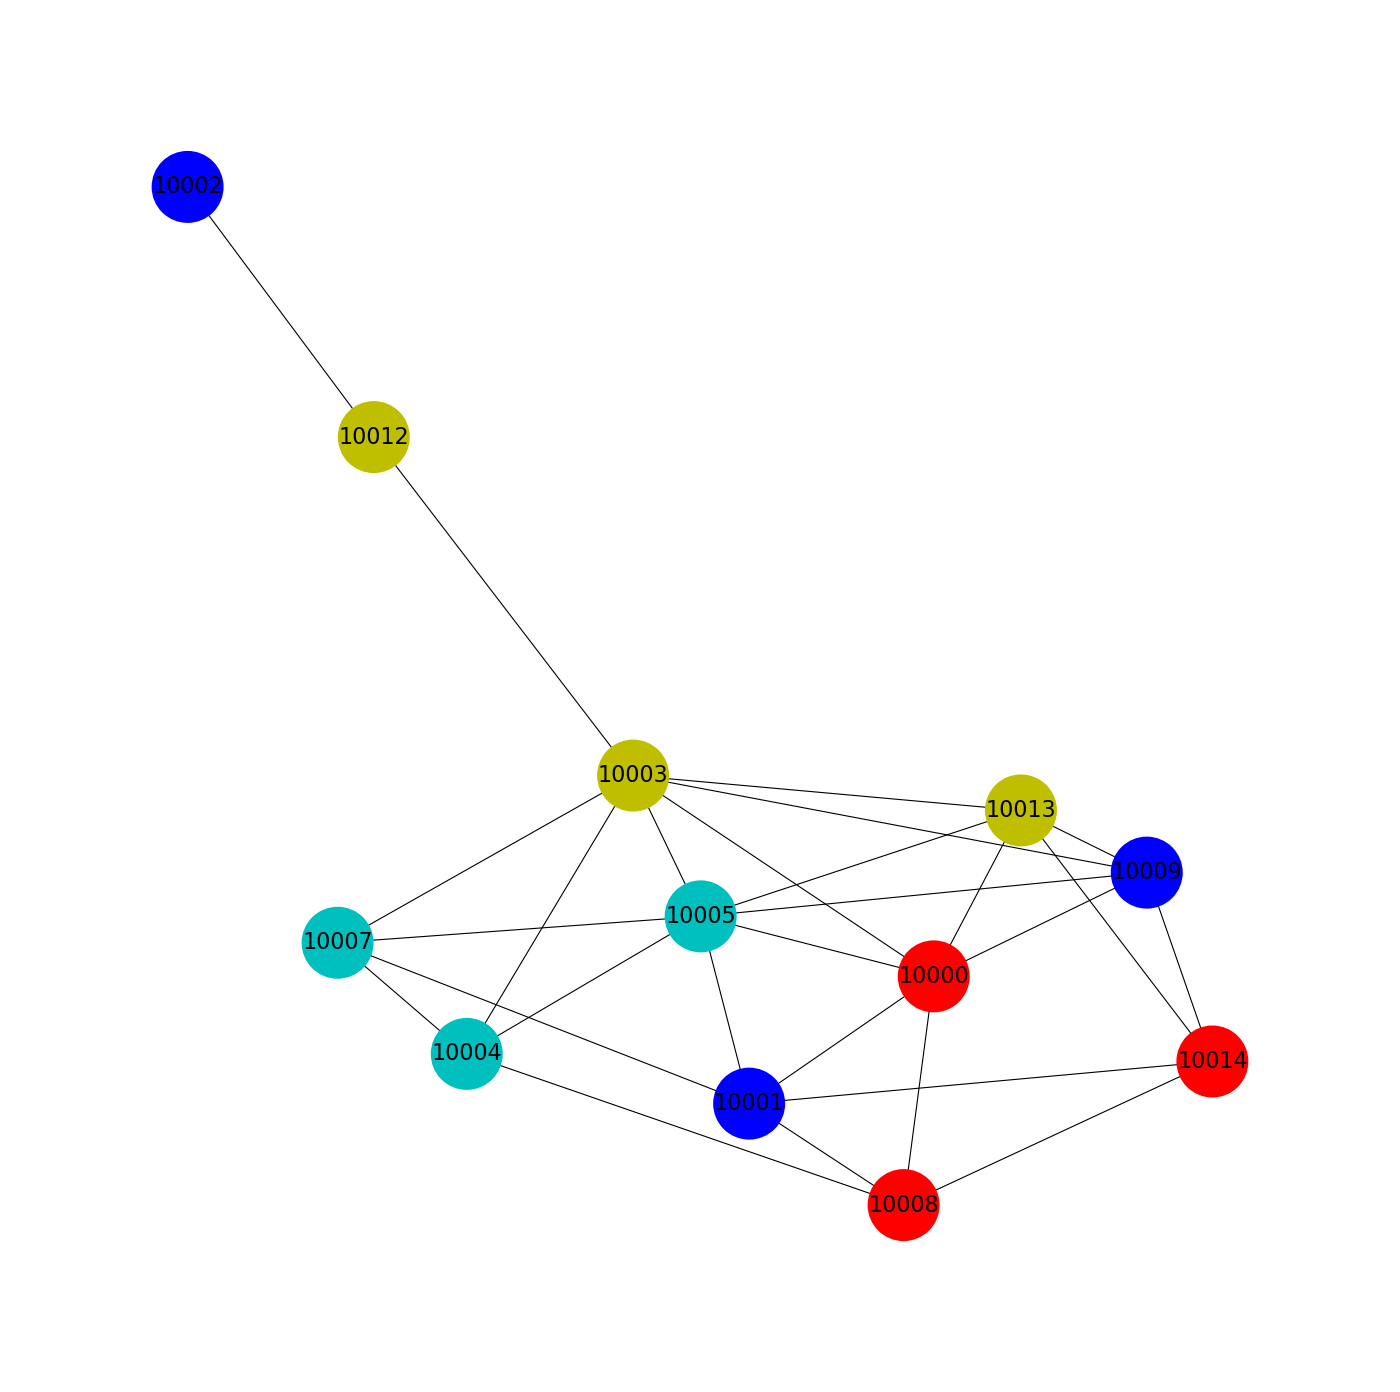

[{'10012', '10000', '10013', '10009', '10008', '10007', '10014', '10005', '10003', '10002', '10004', '10001'}]


,group_id,object_id
0,0,10012
1,0,10000
2,0,10013
3,0,10009
4,0,10008
5,0,10007
6,0,10014
7,0,10005
8,0,10003
9,0,10002


In [3]:
# 数据构建
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

df1 = pd.DataFrame({
    'uid':[str(fake.random_int(10000, 10015)) for i in range(0,12)],
    'email':['em_'+fake.email() for i in range(0,6)]*2
     })

df2 = pd.DataFrame({
    'uid':[str(fake.random_int(10000, 10015)) for i in range(0,12)],
    'ip':[fake.ipv4() for i in range(0,4)]*3
     })

df3 = pd.DataFrame({
    'uid':[str(fake.random_int(10000, 10015)) for i in range(0,12)],
    'nick':['小石头'+str(i) for i in range(0,4)]+['我是帅气的人'+str(i) for i in range(0,4)]+['莫名其妙'+str(i) for i in range(0,4)]
     })

# 数据查看
df3


# 文本处理
df3['nick'] = df3['nick'].str.replace('[0-9a-zA-Z]','')
df3

# 二部图转同构图 -三种关系都要转换成同构图，才能进行比较好的合并
dm    = pd.merge(df1,df1,on='email',how='inner')
last1 = dm.groupby(['uid_x','uid_y']).agg({'email': pd.Series.nunique}).reset_index()
last1 = last1[last1['uid_x']!=last1['uid_y']]
last1.columns = ['uid_x','uid_y','type']
last1['type'] = 'email'

dm    = pd.merge(df2,df2,on='ip',how='inner')
last2 = dm.groupby(['uid_x','uid_y']).agg({'ip': pd.Series.nunique}).reset_index()
last2 = last2[last2['uid_x']!=last2['uid_y']]
last2.columns = ['uid_x','uid_y','type']
last2['type'] = 'ip'


dm    = pd.merge(df3,df3,on='nick',how='inner')
last3 = dm.groupby(['uid_x','uid_y']).agg({'nick': pd.Series.nunique}).reset_index()
last3 = last3[last3['uid_x']!=last3['uid_y']]
last3.columns = ['uid_x','uid_y','type']
last3['type'] = 'nick'

#三种关系合并
df = pd.concat([last1,last2,last3])


#对数据进行聚合
df = df.groupby(['uid_x','uid_y']).agg({'type': pd.Series.nunique}).reset_index()

df.head(50)


# 数据筛选
da = df[df['type']>=1]
#数据可视化


da = da.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

#显示该graph-kamada_kawai_layout spring_layout
colors = ['r','b','y','c']*80
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(2,2),dpi=800)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=30,
                 font_size=2,
                 alpha=1,
                 width=0.1
                 )
#plt.title("kamada_kawai_layout")
plt.axis('off')
plt.show()


# 找到所有连通子图
com = list(nx.connected_components(G))

# 打印看看什么格式的，可以看到得到的结果为列表-字典格式
print(com)

# 将 列表-字典 整理成数据表格形式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 查看数据结果
df_com


# 统计每个团伙人数 并降序
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False) 



# 找一个团伙看看里面的细节
df_com[df_com['group_id']==0]
